##### SciPy in Python is an open-source library used for solving mathematical, scientific, engineering, and technical problems. It allows users to manipulate the data and visualize the data using a wide range of high-level Python commands. SciPy is built on the Python NumPy extention. SciPy is also pronounced as “Sigh Pi.”

###### scipy is composed of task-specific sub-modules:

scipy.cluster	Vector quantization / Kmeans <br>
scipy.constants	Physical and mathematical constants<br>
scipy.fftpack	Fourier transform<br>
scipy.integrate	Integration routines<br>
scipy.interpolate	Interpolation<br>
scipy.io	Data input and output<br>
scipy.linalg	Linear algebra routines<br>
scipy.ndimage	n-dimensional image package<br>
scipy.odr	Orthogonal distance regression<br>
scipy.optimize	Optimization<br>
scipy.signal	Signal processing<br>
scipy.sparse	Sparse matrices<br>
scipy.spatial	Spatial data structures and algorithms<br>
scipy.special	Any special mathematical functions<br>
scipy.stats	Statistics<br>
They all depend on numpy, but are mostly independent of each other. The standard way of importing Numpy and these Scipy modules is:

###### Special functions: scipy.special
Special functions are transcendental functions. The docstring of the scipy.special module is well-written, so we won’t list all functions here. Frequently used ones are:

Bessel function, such as scipy.special.jn() (nth integer order Bessel function)
Elliptic function (scipy.special.ellipj() for the Jacobian elliptic function, …)
Gamma function: scipy.special.gamma(), also note scipy.special.gammaln() which will give the log of Gamma to a higher numerical precision.
Erf, the area under a Gaussian curve: scipy.special.erf()

In [3]:
#Cubic Root function finds the cube root of values.
from scipy.special import cbrt
#Find cubic root of 27 & 64 using cbrt() function
cb = cbrt([27, 64])
#print value of cb
print(cb)

[3. 4.]


In [4]:
#Exponential function computes the 10**x element-wise.
from scipy.special import exp10
#define exp10 function and pass value in its
exp = exp10([1,10])
print(exp)

[1.e+01 1.e+10]


In [5]:
#SciPy also gives functionality to calculate Permutations and Combinations.

#Combinations – scipy.special.comb(N,k)
from scipy.special import comb
#find combinations of 5, 2 values using comb(N, k)
com = comb(5, 2, exact = False, repetition=True)
print(com)

15.0


In [6]:
#Permutations
from scipy.special import perm
#find permutation of 5, 2 using perm (N, k) function
per = perm(5, 2, exact = True)
print(per)

20


In [7]:
#Log Sum Exponential computes the log of sum exponential input element.
from scipy.special import logsumexp
#define exp10 function and pass value in its
x = logsumexp([1,10])
print(exp)

[1.e+01 1.e+10]


###### Linear algebra operations: scipy.linalg
 The scipy.linalg module provides standard linear algebra operations, relying on an underlying efficient implementation (BLAS, LAPACK).

In [8]:
#The scipy.linalg.det() function computes the determinant of a square matrix:


from scipy import linalg
import numpy as np
arr = np.array([[1, 2],
                [3, 4]])
linalg.det(arr)


#linalg.det(np.ones((3, 4)))

-2.0

In [9]:
arr = np.array([[3, 2],
                [6, 4]])
linalg.det(arr) 


6.661338147750939e-16

In [10]:
#The scipy.linalg.inv() function computes the inverse of a square matrix:


arr = np.array([[1, 2],
                [3, 4]])
iarr = linalg.inv(arr)
iarr


array([[-2. ,  1. ],
       [ 1.5, -0.5]])

###### Interpolation: scipy.interpolate
scipy.interpolate is useful for fitting a function from experimental data and thus evaluating points where no measure exists. The module is based on the FITPACK Fortran subroutines.

In [11]:
#By imagining experimental data close to a sine function:

measured_time = np.linspace(0, 1, 10)
noise = (np.random.random(10)*2 - 1) * 1e-1
measures = np.sin(2 * np.pi * measured_time) + noise

In [12]:
#scipy.interpolate.interp1d can build a linear interpolation function:

from scipy.interpolate import interp1d
linear_interp = interp1d(measured_time, measures)

In [13]:
#Then the result can be evaluated at the time of interest:

interpolation_time = np.linspace(0, 1, 50)
linear_results = linear_interp(interpolation_time)

In [14]:
#A cubic interpolation can also be selected by providing the kind optional keyword argument:

cubic_interp = interp1d(measured_time, measures, kind='cubic')
cubic_results = cubic_interp(interpolation_time)

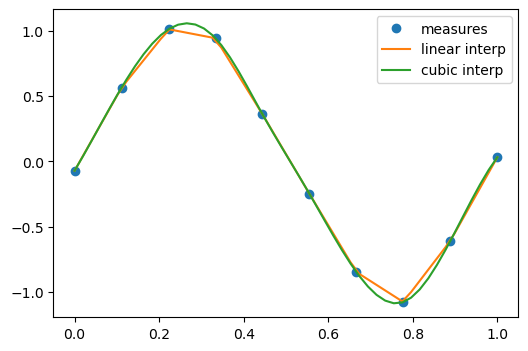

In [15]:
# Plot the data and the interpolation
from matplotlib import pyplot as plt
plt.figure(figsize=(6, 4))
plt.plot(measured_time, measures, 'o', ms=6, label='measures')
plt.plot(interpolation_time, linear_results, label='linear interp')
plt.plot(interpolation_time, cubic_results, label='cubic interp')
plt.legend()
plt.show()

###### scipy.interpolate.interp2d is similar to scipy.interpolate.interp1d, but for 2-D arrays. Note that for the interp family, the interpolation points must stay within the range of given data points. See the summary exercise on Maximum wind speed prediction at the Sprogø station for a more advanced spline interpolation example.

###### Optimization and fit: scipy.optimize
Optimization is the problem of finding a numerical solution to a minimization or equality.

 The scipy.optimize module provides algorithms for function minimization (scalar or multi-dimensional), curve fitting and root finding.



In [16]:
from scipy import optimize

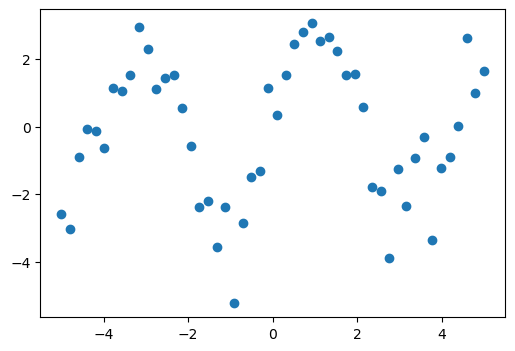

In [21]:
#Suppose we have data on a sine wave, with some noise:

x_data = np.linspace(-5, 5, num=50)
y_data = 2.9 * np.sin(1.5 * x_data) + np.random.normal(size=50)


# And plot it
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 4))
plt.scatter(x_data, y_data)

In [22]:
#If we know that the data lies on a sine wave, but not the amplitudes or the period, we can find those by least squares curve fitting. First we have to define the test function to fit, here a sine with unknown amplitude and period:

def test_func(x, a, b):
    return a * np.sin(b * x)


In [23]:

#We then use scipy.optimize.curve_fit() to find a and b:

params, params_covariance = optimize.curve_fit(test_func, x_data, y_data, p0=[2, 2])
print(params)

[2.67796833 1.49534382]


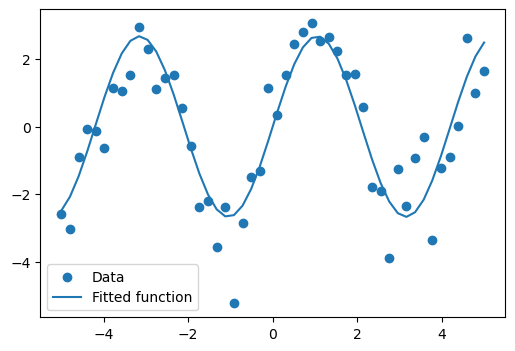

In [24]:
plt.figure(figsize=(6, 4))
plt.scatter(x_data, y_data, label='Data')
plt.plot(x_data, test_func(x_data, params[0], params[1]),
         label='Fitted function')

plt.legend(loc='best')

plt.show()

###### Finding the minimum of a scalar function

Let’s define the following function:

In [25]:
def f(x):
    return x**2 + 10*np.sin(x)

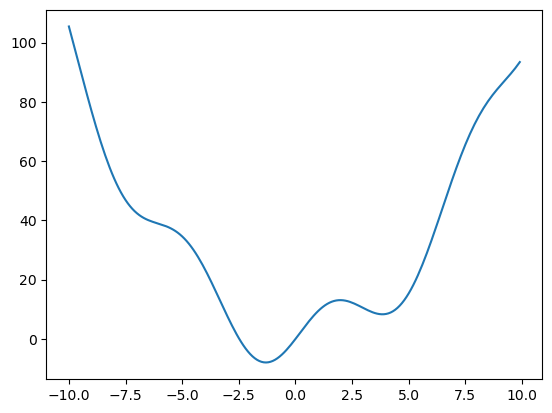

In [26]:
x = np.arange(-10, 10, 0.1)
plt.plot(x, f(x)) 
plt.show() 

###### This function has a global minimum around -1.3 and a local minimum around 3.8.

Searching for minimum can be done with scipy.optimize.minimize(), given a starting point x0, it returns the location of the minimum that it has found:
The result of scipy.optimize.minimize() is a compound object comprising all information on the convergence



In [27]:
result = optimize.minimize(f, x0=0)
result
result.x # The coordinate of the minimum

array([-1.30644012])

In [30]:
#Methods: As the function is a smooth function, gradient-descent based methods are good options. 
#The lBFGS algorithm is a good choice in general:


optimize.minimize(f, x0=0, method="L-BFGS-B")
#Note how it cost only 12 functions evaluation above to find a good value for the minimum.



  message: CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL
  success: True
   status: 0
      fun: -7.94582337561514
        x: [-1.306e+00]
      nit: 5
      jac: [-1.688e-06]
     nfev: 12
     njev: 6
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>

In [31]:
#Global minimum: A possible issue with this approach is that, if the function has local minima, 
#the algorithm may find these local minima instead of the global minimum depending on the initial point x0:

res = optimize.minimize(f, x0=3, method="L-BFGS-B")
res.x

array([3.83746709])

###### If we don’t know the neighborhood of the global minimum to choose the initial point, we need to resort to costlier global optimization. To find the global minimum, we use scipy.optimize.basinhopping() (added in version 0.12.0 of Scipy). It combines a local optimizer with sampling of starting points:


In [32]:


optimize.basinhopping(f, 0)  

                    message: ['requested number of basinhopping iterations completed successfully']
                    success: True
                        fun: -7.9458233756152845
                          x: [-1.306e+00]
                        nit: 100
      minimization_failures: 0
                       nfev: 1024
                       njev: 512
 lowest_optimization_result:  message: Optimization terminated successfully.
                              success: True
                               status: 0
                                  fun: -7.9458233756152845
                                    x: [-1.306e+00]
                                  nit: 3
                                  jac: [ 1.192e-07]
                             hess_inv: [[ 8.585e-02]]
                                 nfev: 10
                                 njev: 5

###### Minimizing functions of several variables

To minimize over several variables, the trick is to turn them into a function of a multi-dimensional variable (a vector). See for instance the exercise on 2D minimization below.

Note scipy.optimize.minimize_scalar() is a function with dedicated methods to minimize functions of only one variable.

In [33]:
# Define the function that we are interested in
def sixhump(x):
    return ((4 - 2.1*x[0]**2 + x[0]**4 / 3.) * x[0]**2 + x[0] * x[1]
            + (-4 + 4*x[1]**2) * x[1] **2)

# Make a grid to evaluate the function (for plotting)
x = np.linspace(-2, 2)
y = np.linspace(-1, 1)
xg, yg = np.meshgrid(x, y)

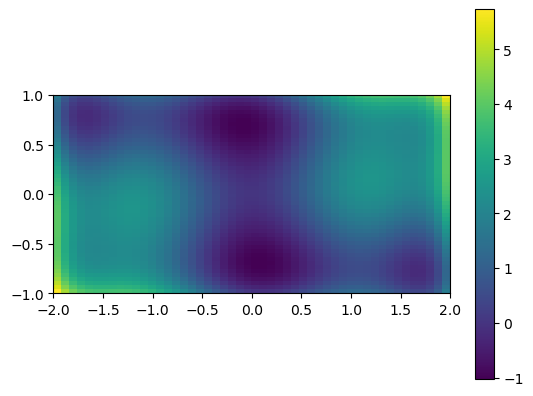

In [34]:
#A 2D image plot of the function - Simple visualization in 2D

import matplotlib.pyplot as plt
plt.figure()
plt.imshow(sixhump([xg, yg]), extent=[-2, 2, -1, 1], origin="lower")
plt.colorbar()

Text(0.5, 0.92, 'Six-hump Camelback function')

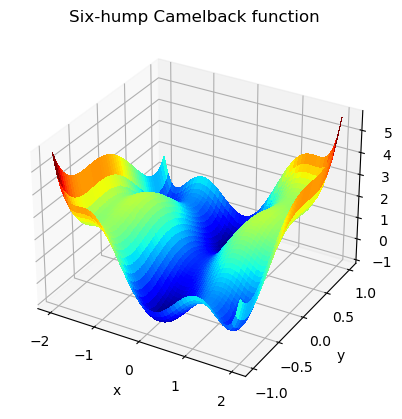

In [35]:
#A 3D surface plot of the function 

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(xg, yg, sixhump([xg, yg]), rstride=1, cstride=1,
                       cmap=plt.cm.jet, linewidth=0, antialiased=False)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
ax.set_title('Six-hump Camelback function')

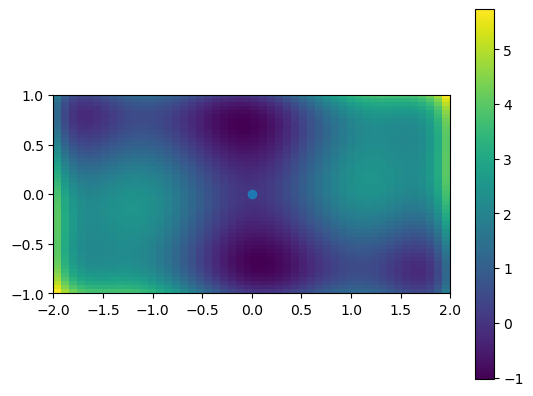

In [36]:
#Find the minima ###########################################################

from scipy import optimize

x_min = optimize.minimize(sixhump, x0=[0, 0])

plt.figure()
# Show the function in 2D
plt.imshow(sixhump([xg, yg]), extent=[-2, 2, -1, 1], origin="lower")
plt.colorbar()
# And the minimum that we've found:
plt.scatter(x_min.x[0], x_min.x[1])

plt.show()

###### Finding the roots of a scalar function

In [38]:
#To find a root, i.e. a point where f(x) = 0, of the function f(x)=x**2 + 10*np.sin(x) above we can use scipy.optimize.root():

root = optimize.root(f, x0=1)  # our initial guess is 1
root    # The full result



 message: The solution converged.
 success: True
  status: 1
     fun: [ 0.000e+00]
       x: [ 0.000e+00]
    nfev: 10
    fjac: [[-1.000e+00]]
       r: [-1.000e+01]
     qtf: [ 1.333e-32]

In [39]:
root.x  # Only the root found

array([0.])

###### Statistics and random numbers: scipy.stats
The module scipy.stats contains statistical tools and probabilistic descriptions of random processes. Random number generators for various random process can be found in numpy.random.

In [40]:
#Distributions: histogram and probability density function
#Given observations of a random process, their histogram is an estimator of the random process’s 
#PDF (probability density function):

samples = np.random.normal(size=1000)
bins = np.arange(-4, 5)
bins



array([-4, -3, -2, -1,  0,  1,  2,  3,  4])

In [41]:
histogram = np.histogram(samples, bins=bins, density=True)[0]
bins = 0.5*(bins[1:] + bins[:-1])
bins



array([-3.5, -2.5, -1.5, -0.5,  0.5,  1.5,  2.5,  3.5])

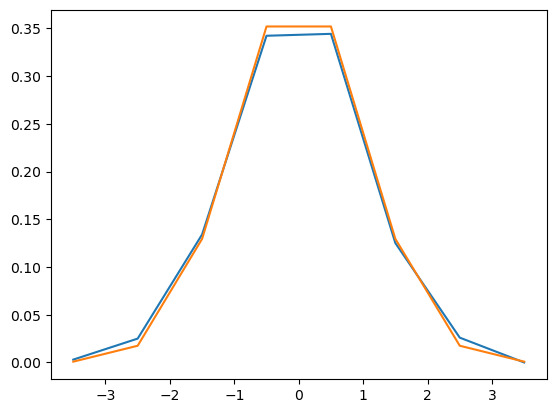

In [42]:
from scipy import stats
pdf = stats.norm.pdf(bins)  # norm is a distribution object

plt.plot(bins, histogram) 

plt.plot(bins, pdf) 

In [43]:
#Mean, median and percentiles
#The mean is an estimator of the center of the distribution:

np.mean(samples)

-0.032249763154060106

In [44]:
#The median another estimator of the center. It is the value with half of the observations below,
#and half above:


np.median(samples)     

#Unlike the mean, the median is not sensitive to the tails of the distribution. It is “robust”

-0.015697245767222187

In [45]:
#The median is also the percentile 50, because 50% of the observation are below it:

stats.scoreatpercentile(samples, 50)   

-0.015697245767222187

In [46]:
#Similarly, we can calculate the percentile 90:

stats.scoreatpercentile(samples, 90)   

1.2170093533430877

###### Statistical tests

A statistical test is a decision indicator. For instance, if we have two sets of observations, that we assume are generated from Gaussian processes, we can use a T-test to decide whether the means of two sets of observations are significantly different:

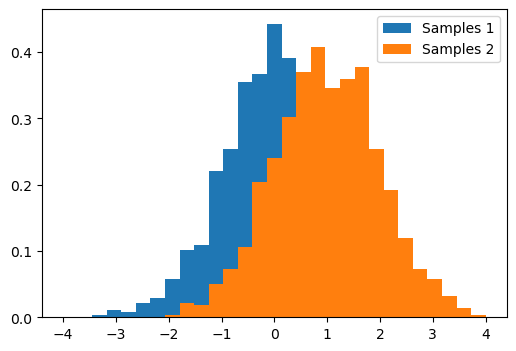

In [47]:
# Generates 2 sets of observations
samples1 = np.random.normal(0, size=1000)
samples2 = np.random.normal(1, size=1000)

# Compute a histogram of the sample
bins = np.linspace(-4, 4, 30)
histogram1, bins = np.histogram(samples1, bins=bins, density=True)
histogram2, bins = np.histogram(samples2, bins=bins, density=True)

plt.figure(figsize=(6, 4))
plt.hist(samples1, bins=bins, density=True, label="Samples 1")
plt.hist(samples2, bins=bins, density=True, label="Samples 2")
plt.legend(loc='best')
plt.show()

####### The resulting output is composed of:<br>
The T statistic value: it is a number the sign of which is proportional to the difference between the two random processes and the magnitude is related to the significance of this difference.<br>

the p value: the probability of both processes being identical. If it is close to 1, the two process are almost certainly identical. The closer it is to zero, the more likely it is that the processes have different means

In [49]:
stats.ttest_ind(samples1, samples2) 

Ttest_indResult(statistic=-21.55852763706314, pvalue=7.502220894318558e-93)

#### Numerical integration: scipy.integrate


###### Function integrals
The most generic integration routine is scipy.integrate.quad(). To compute sine function 

In [51]:
from scipy.integrate import quad
res, err = quad(np.sin, 0, np.pi/2)
np.allclose(res, 1)   # res is the result, is should be close to 1



True

In [52]:
np.allclose(err, 1 - res)  # err is an estimate of the err

True

Other integration schemes are available: scipy.integrate.fixed_quad(), scipy.integrate.quadrature(), scipy.integrate.romberg()

##### Integrating differential equations

scipy.integrate also features routines for integrating Ordinary Differential Equations (ODE). In particular, scipy.integrate.odeint() solves ODE of the form:

dy/dt = rhs(y1, y2, .., t0,...)

let us solve the ODE dy/dt = -2 y between t = 0 ... 4, with the initial condition y(t=0) = 1. First the function computing the derivative of the position needs to be defined:

In [56]:
import numpy as np
from scipy.integrate import odeint
from matplotlib import pyplot as plt

def calc_derivative(ypos, time):
    return -2*ypos

In [57]:
#Then, to compute y as a function of time:

time_vec = np.linspace(0, 4, 40)
yvec = odeint(calc_derivative, 1, time_vec)

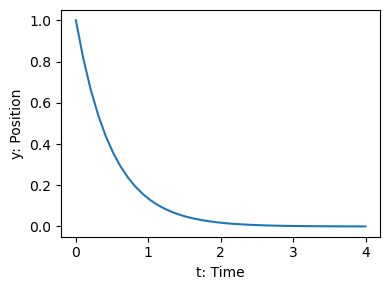

In [58]:
plt.figure(figsize=(4, 3))
plt.plot(time_vec, yvec)
plt.xlabel('t: Time')
plt.ylabel('y: Position')
plt.tight_layout()

##### Fast Fourier transforms: scipy.fftpack

The scipy.fftpack module computes fast Fourier transforms (FFTs) and offers utilities to handle them. The main functions are:

scipy.fftpack.fft() to compute the FFT
scipy.fftpack.fftfreq() to generate the sampling frequencies
scipy.fftpack.ifft() computes the inverse FFT, from frequency space to signal space

As an illustration, a (noisy) input signal (sig), and its FFT:

In [1]:
import numpy as np
from scipy import fftpack
from matplotlib import pyplot as plt

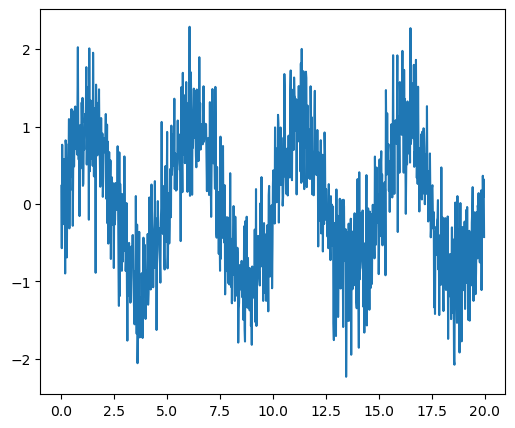

In [2]:
#Generate the signal ###########################################################

# Seed the random number generator
np.random.seed(1234)

time_step = 0.02
period = 5.

time_vec = np.arange(0, 20, time_step)
sig = (np.sin(2 * np.pi / period * time_vec)
       + 0.5 * np.random.randn(time_vec.size))

plt.figure(figsize=(6, 5))
plt.plot(time_vec, sig, label='Original signal')

[]

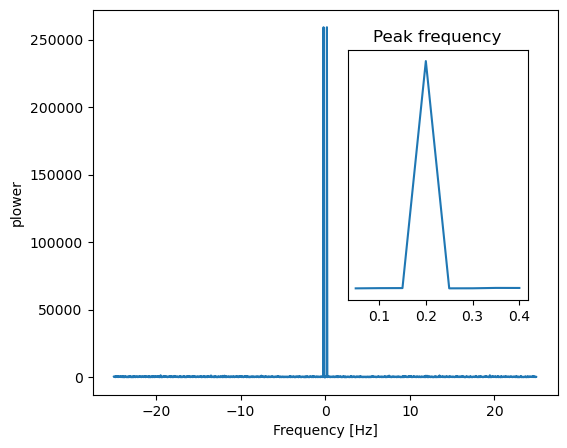

In [3]:
#Compute and plot the power ###########################################################

# The FFT of the signal
sig_fft = fftpack.fft(sig)

# And the power (sig_fft is of complex dtype)
power = np.abs(sig_fft)**2

# The corresponding frequencies
sample_freq = fftpack.fftfreq(sig.size, d=time_step)

# Plot the FFT power
plt.figure(figsize=(6, 5))
plt.plot(sample_freq, power)
plt.xlabel('Frequency [Hz]')
plt.ylabel('plower')

# Find the peak frequency: we can focus on only the positive frequencies
pos_mask = np.where(sample_freq > 0)
freqs = sample_freq[pos_mask]
peak_freq = freqs[power[pos_mask].argmax()]

# Check that it does indeed correspond to the frequency that we generate
# the signal with
np.allclose(peak_freq, 1./period)

# An inner plot to show the peak frequency
axes = plt.axes([0.55, 0.3, 0.3, 0.5])
plt.title('Peak frequency')
plt.plot(freqs[:8], power[pos_mask][:8])
plt.setp(axes, yticks=[])

# scipy.signal.find_peaks_cwt can also be used for more advanced
# peak detection

C:\ProgramData\anaconda3\Lib\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


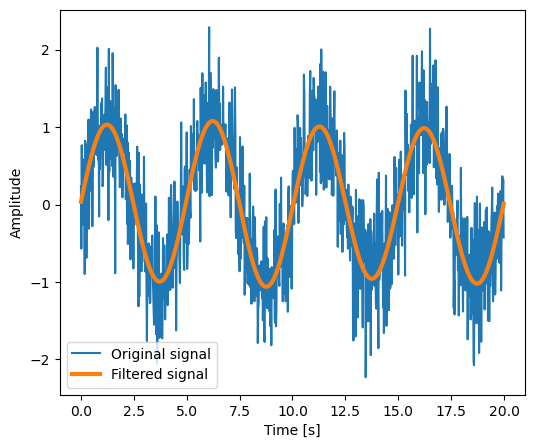

In [4]:
#Remove all the high frequencies ###########################################################

#We now remove all the high frequencies and transform back from frequencies to signal.

high_freq_fft = sig_fft.copy()
high_freq_fft[np.abs(sample_freq) > peak_freq] = 0
filtered_sig = fftpack.ifft(high_freq_fft)

plt.figure(figsize=(6, 5))
plt.plot(time_vec, sig, label='Original signal')
plt.plot(time_vec, filtered_sig, linewidth=3, label='Filtered signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')

plt.legend(loc='best')

As the signal comes from a real function, the Fourier transform is symmetric.

The peak signal frequency can be found with freqs[power.argmax()]

Setting the Fourrier component above this frequency to zero and inverting the FFT with scipy.fftpack.ifft(), gives a filtered signal.

###### Signal processing: scipy.signal
 scipy.signal is for typical signal processing: 1D, regularly-sampled signals.
Resampling scipy.signal.resample(): resample a signal to n points using FFT.

Resample a signal with scipy.signal.resample
:func:scipy.signal.resample uses FFT to resample a 1D signal.

Generate a signal with 100 data point



In [5]:
import numpy as np
t = np.linspace(0, 5, 100)
x = np.sin(t)

In [6]:
#Downsample it by a factor of 4

from scipy import signal
x_resampled = signal.resample(x, 25)

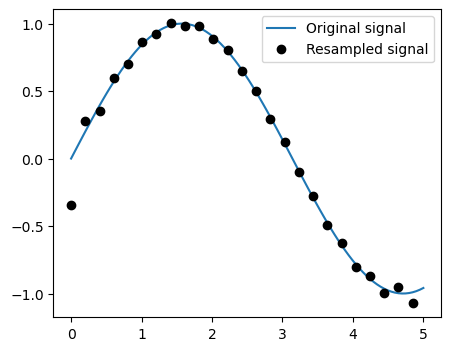

In [7]:
#Plot

from matplotlib import pyplot as plt
plt.figure(figsize=(5, 4))
plt.plot(t, x, label='Original signal')
plt.plot(t[::4], x_resampled, 'ko', label='Resampled signal')

plt.legend(loc='best')
plt.show()

Notice how on the side of the window the resampling is less accurate and has a rippling effect.
This resampling is different from the interpolation provided by scipy.interpolate as it only applies to regularly sampled data.

Detrending scipy.signal.detrend(): remove linear trend from signal:

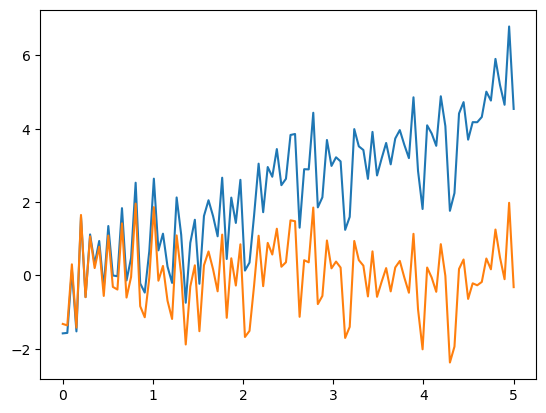

In [8]:
t = np.linspace(0, 5, 100)
x = t + np.random.normal(size=100)

from scipy import signal
x_detrended = signal.detrend(x)

plt.plot(t, x) 

plt.plot(t, x_detrended) 

Filtering: For non-linear filtering, scipy.signal has filtering (median filter scipy.signal.medfilt(), Wiener scipy.signal.wiener()), but we will discuss this in the image section.

 scipy.signal also has a full-blown set of tools for the design of linear filter (finite and infinite response filters), but this is out of the scope of this tutorial.

C:\Users\DELL\AppData\Local\Temp\ipykernel_4216\1782216300.py:5: DeprecationWarning: scipy.misc.face has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.face instead.
  face = misc.face(gray=True)


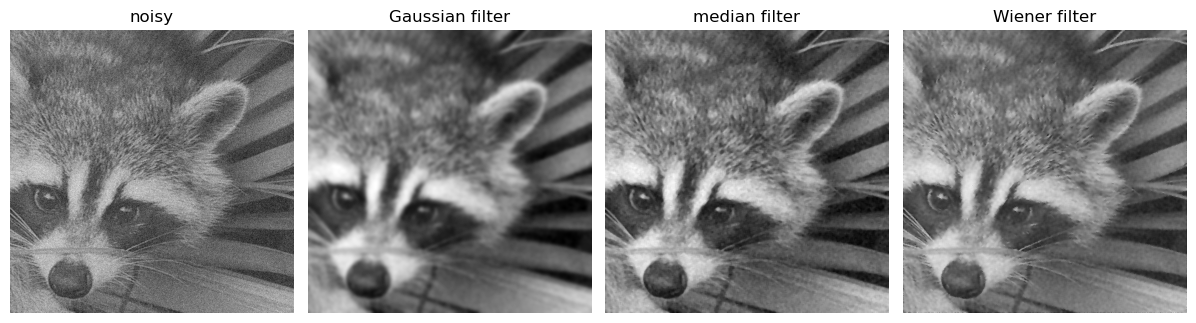

In [10]:
#Demo filtering for denoising of images.

# Load some data
from scipy import misc
face = misc.face(gray=True)
face = face[:512, -512:]  # crop out square on right

# Apply a variety of filters
from scipy import ndimage
from scipy import signal
from matplotlib import pyplot as plt

import numpy as np
noisy_face = np.copy(face).astype(float)
noisy_face += face.std() * 0.5 * np.random.standard_normal(face.shape)
blurred_face = ndimage.gaussian_filter(noisy_face, sigma=3)
median_face = ndimage.median_filter(noisy_face, size=5)
wiener_face = signal.wiener(noisy_face, (5, 5))

plt.figure(figsize=(12, 3.5))
plt.subplot(141)
plt.imshow(noisy_face, cmap=plt.cm.gray)
plt.axis('off')
plt.title('noisy')

plt.subplot(142)
plt.imshow(blurred_face, cmap=plt.cm.gray)
plt.axis('off')
plt.title('Gaussian filter')

plt.subplot(143)
plt.imshow(median_face, cmap=plt.cm.gray)
plt.axis('off')
plt.title('median filter')

plt.subplot(144)
plt.imshow(wiener_face, cmap=plt.cm.gray)
plt.title('Wiener filter')
plt.axis('off')

plt.subplots_adjust(wspace=.05, left=.01, bottom=.01, right=.99, top=.99)

plt.show()

###### Image manipulation: scipy.ndimage
scipy.ndimage provides manipulation of n-dimensional arrays as images.
Geometrical transformations on images
Changing orientation, resolution, .. 

C:\Users\DELL\AppData\Local\Temp\ipykernel_4216\922456584.py:3: DeprecationWarning: scipy.misc.face has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.face instead.
  face = misc.face(gray=True)


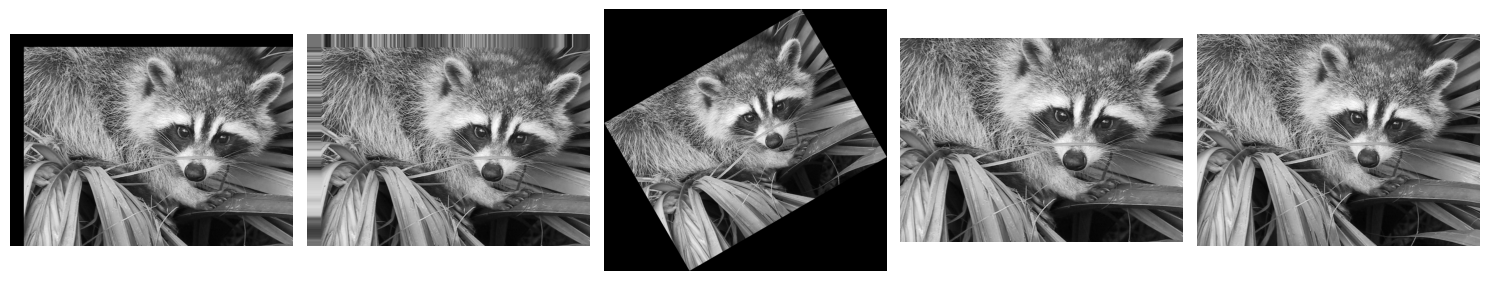

In [11]:
# Load some data
from scipy import misc
face = misc.face(gray=True)

# Apply a variety of transformations
from scipy import ndimage
from matplotlib import pyplot as plt
shifted_face = ndimage.shift(face, (50, 50))
shifted_face2 = ndimage.shift(face, (50, 50), mode='nearest')
rotated_face = ndimage.rotate(face, 30)
cropped_face = face[50:-50, 50:-50]
zoomed_face = ndimage.zoom(face, 2)
zoomed_face.shape

plt.figure(figsize=(15, 3))
plt.subplot(151)
plt.imshow(shifted_face, cmap=plt.cm.gray)
plt.axis('off')

plt.subplot(152)
plt.imshow(shifted_face2, cmap=plt.cm.gray)
plt.axis('off')

plt.subplot(153)
plt.imshow(rotated_face, cmap=plt.cm.gray)
plt.axis('off')

plt.subplot(154)
plt.imshow(cropped_face, cmap=plt.cm.gray)
plt.axis('off')

plt.subplot(155)
plt.imshow(zoomed_face, cmap=plt.cm.gray)
plt.axis('off')

plt.subplots_adjust(wspace=.05, left=.01, bottom=.01, right=.99, top=.99)

plt.show()

###### Mathematical morphology
 Mathematical morphology stems from set theory. It characterizes and transforms geometrical structures. Binary (black and white) images, in particular, can be transformed using this theory: the sets to be transformed are the sets of neighboring non-zero-valued pixels. The theory was also extended to gray-valued images.

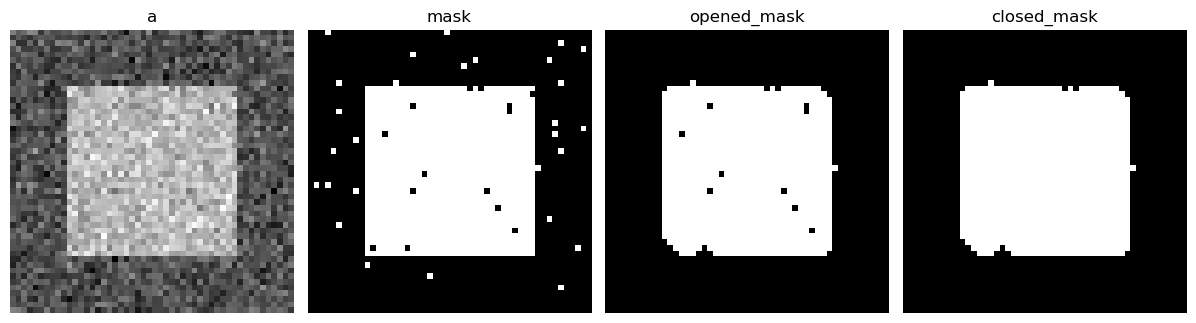

In [12]:
#A basic demo of binary opening and closing.

# Generate some binary data
import numpy as np
np.random.seed(0)
a = np.zeros((50, 50))
a[10:-10, 10:-10] = 1
a += 0.25 * np.random.standard_normal(a.shape)
mask = a>=0.5

# Apply mathematical morphology
from scipy import ndimage
opened_mask = ndimage.binary_opening(mask)
closed_mask = ndimage.binary_closing(opened_mask)

# Plot
from matplotlib import pyplot as plt

plt.figure(figsize=(12, 3.5))
plt.subplot(141)
plt.imshow(a, cmap=plt.cm.gray)
plt.axis('off')
plt.title('a')

plt.subplot(142)
plt.imshow(mask, cmap=plt.cm.gray)
plt.axis('off')
plt.title('mask')

plt.subplot(143)
plt.imshow(opened_mask, cmap=plt.cm.gray)
plt.axis('off')
plt.title('opened_mask')

plt.subplot(144)
plt.imshow(closed_mask, cmap=plt.cm.gray)
plt.title('closed_mask')
plt.axis('off')

plt.subplots_adjust(wspace=.05, left=.01, bottom=.01, right=.99, top=.99)

plt.show()

Connected components and measurements on images
Let us first generate a nice synthetic binary image.

In [13]:
x, y = np.indices((100, 100))
sig = np.sin(2*np.pi*x/50.) * np.sin(2*np.pi*y/50.) * (1+x*y/50.**2)**2
mask = sig > 1

scipy.ndimage.label() assigns a different label to each connected component:

In [14]:
labels, nb = ndimage.label(mask)
nb

8

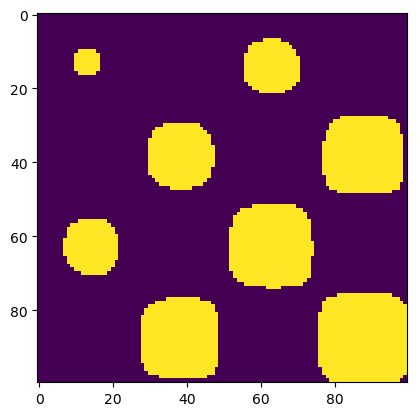

In [19]:

plt.imshow(mask)

In [20]:
#Now compute measurements on each connected component:

areas = ndimage.sum(mask, labels, range(1, labels.max()+1))
areas   # The number of pixels in each connected component

maxima = ndimage.maximum(sig, labels, range(1, labels.max()+1))
maxima  # The maximum signal in each connected component

array([ 1.80238238,  1.13527605,  5.51954079,  2.49611818,  6.71673619,
        1.80238238, 16.76547217,  5.51954079])

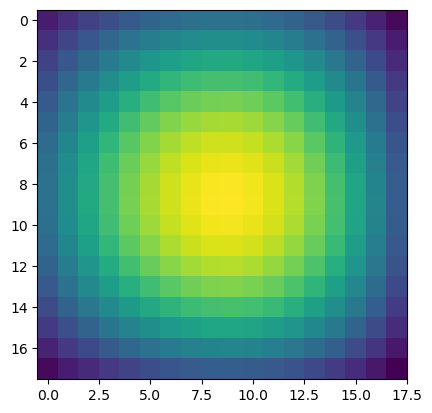

In [21]:
#Extract the 4th connected component, and crop the array around it:


ndimage.find_objects(labels==4) 

sl = ndimage.find_objects(labels==4)
from matplotlib import pyplot as plt
plt.imshow(sig[sl[0]])